# RAINFALL PREDICTION IN AUS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("weatherAUS.csv")
df=df.set_index("Date")

In [3]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


# find null values

In [5]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 

# fill null values (int/float) (with mean)

In [8]:
df["MinTemp"].fillna(df["MinTemp"].mean(),inplace=True)

In [9]:
df["MaxTemp"].fillna(df["MaxTemp"].mean(),inplace=True)

In [10]:
df["Rainfall"].fillna(df["Rainfall"].mean(),inplace=True)

In [11]:
df["Evaporation"].fillna(df["Evaporation"].mean(),inplace=True)

In [12]:
df["Sunshine"].fillna(df["Sunshine"].mean(),inplace=True)

In [13]:
df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean(),inplace=True)

In [14]:
df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean(),inplace=True)

In [15]:
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean(),inplace=True)

In [16]:
df["Humidity9am"].fillna(df["Humidity9am"].mean(),inplace=True)

In [17]:
df["Humidity3pm"].fillna(df["Humidity3pm"].mean(),inplace=True)

In [18]:
df["Pressure9am"].fillna(df["Pressure9am"].mean(),inplace=True)

In [19]:
df["Pressure3pm"].fillna(df["Pressure3pm"].mean(),inplace=True)

In [20]:
df["Cloud9am"].fillna(df["Cloud9am"].mean(),inplace=True)

In [21]:
df["Cloud3pm"].fillna(df["Cloud3pm"].mean(),inplace=True)

In [22]:
df["Temp9am"].fillna(df["Temp9am"].mean(),inplace=True)

In [23]:
df["Temp3pm"].fillna(df["Temp3pm"].mean(),inplace=True)

# fill null values (object) (with mode)

In [25]:
df["WindGustDir"].fillna(df["WindGustDir"].mode()[0],inplace=True)

In [26]:
df["WindDir9am"].fillna(df["WindDir9am"].mode()[0],inplace=True)

In [27]:
df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0],inplace=True)

In [28]:
df["RainToday"].fillna(df["RainToday"].mode()[0],inplace=True)

In [29]:
df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460

In [31]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# outlier detection (only int/float columns)

In [33]:
df.describe().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

q1----------> 7.7
q2----------> 12.1
q3----------> 16.8
iqr----------> 9.100000000000001
upper----------> 30.450000000000003
lower----------> 3.1499999999999986


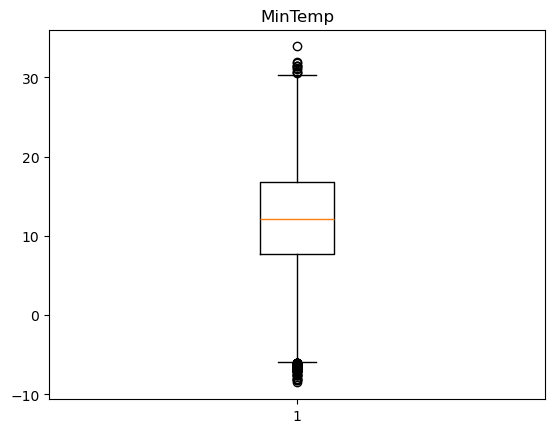

q1----------> 18.0
q2----------> 22.7
q3----------> 28.2
iqr----------> 10.2
upper----------> 43.5
lower----------> 12.9


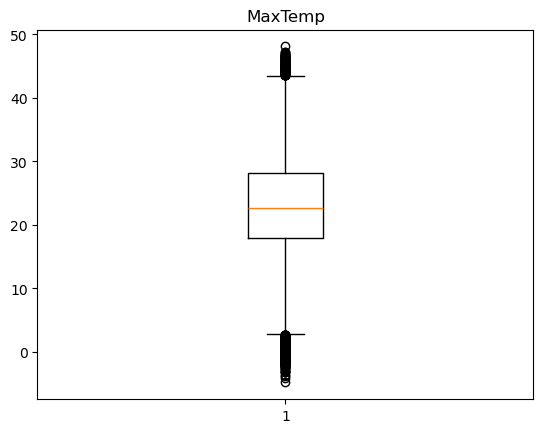

q1----------> 0.0
q2----------> 0.0
q3----------> 1.0
iqr----------> 1.0
upper----------> 2.5
lower----------> -0.5


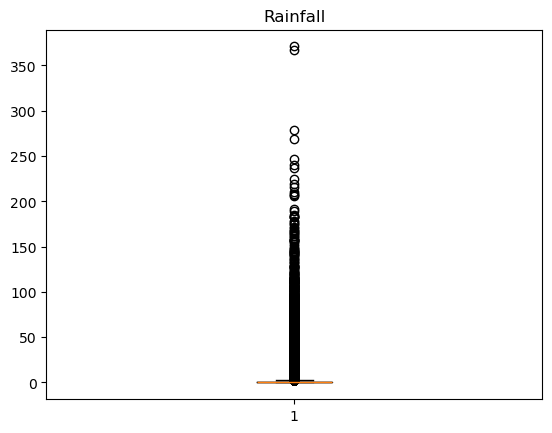

q1----------> 4.0
q2----------> 5.468231522922462
q3----------> 5.468231522922462
iqr----------> 1.468231522922462
upper----------> 7.670578807306155
lower----------> 3.265884238538769


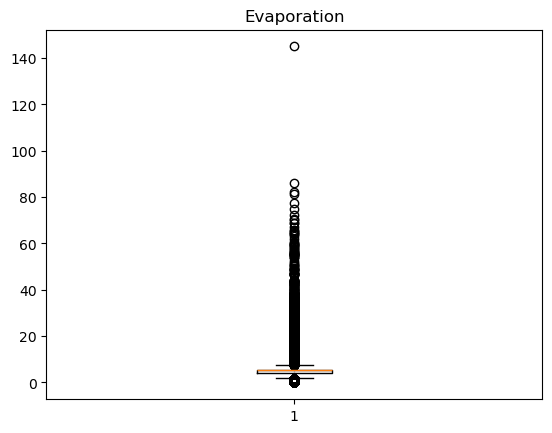

q1----------> 7.6111775206611565
q2----------> 7.6111775206611565
q3----------> 8.7
iqr----------> 1.0888224793388428
upper----------> 10.333233719008263
lower----------> 7.066766280991735


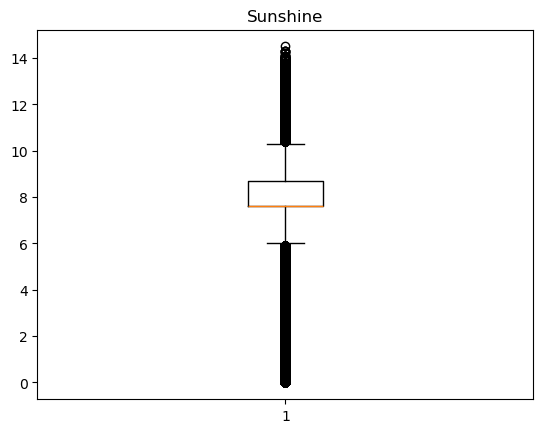

q1----------> 31.0
q2----------> 39.0
q3----------> 46.0
iqr----------> 15.0
upper----------> 68.5
lower----------> 23.5


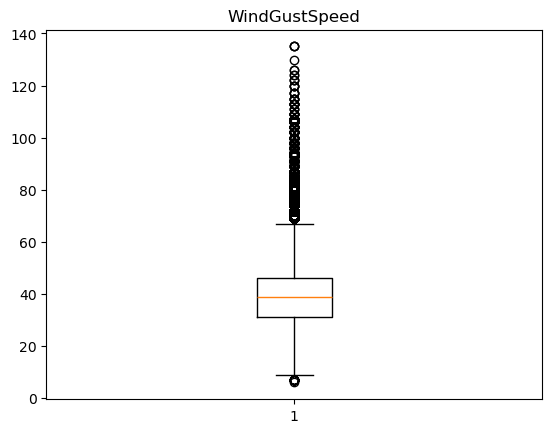

q1----------> 7.0
q2----------> 13.0
q3----------> 19.0
iqr----------> 12.0
upper----------> 37.0
lower----------> 1.0


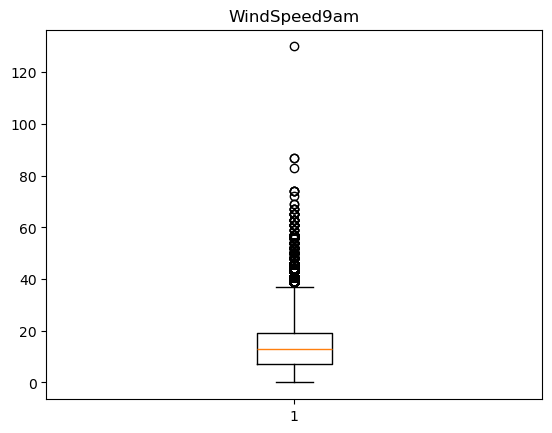

q1----------> 13.0
q2----------> 18.662656778887342
q3----------> 24.0
iqr----------> 11.0
upper----------> 40.5
lower----------> 7.5


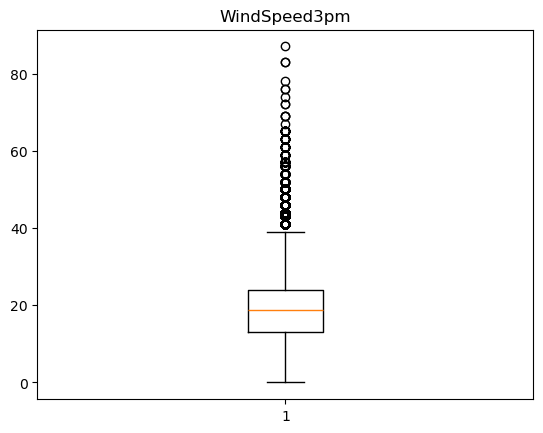

q1----------> 57.0
q2----------> 69.0
q3----------> 83.0
iqr----------> 26.0
upper----------> 122.0
lower----------> 44.0


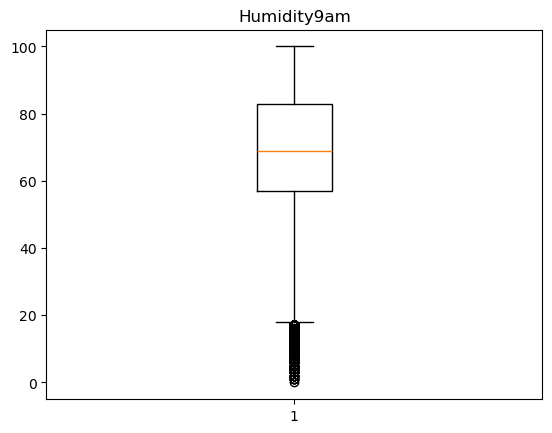

q1----------> 37.0
q2----------> 51.5391158755046
q3----------> 65.0
iqr----------> 28.0
upper----------> 107.0
lower----------> 23.0


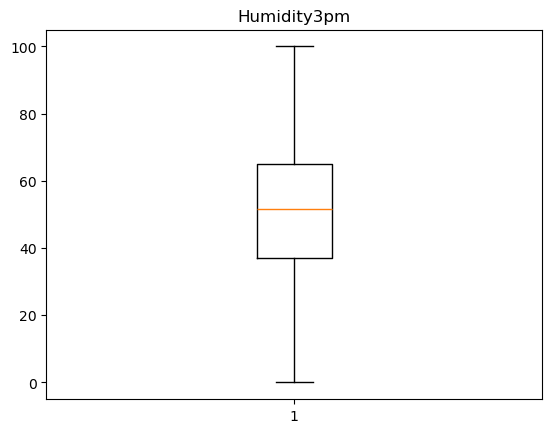

q1----------> 1013.5
q2----------> 1017.6499397983052
q3----------> 1021.8
iqr----------> 8.299999999999955
upper----------> 1034.25
lower----------> 1009.35


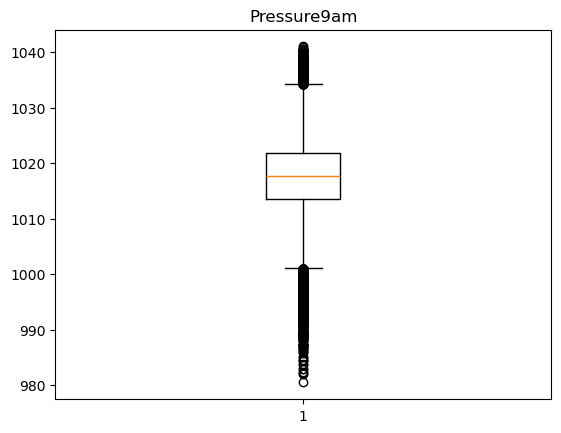

q1----------> 1011.1
q2----------> 1015.2558888309618
q3----------> 1019.4
iqr----------> 8.299999999999955
upper----------> 1031.85
lower----------> 1006.95


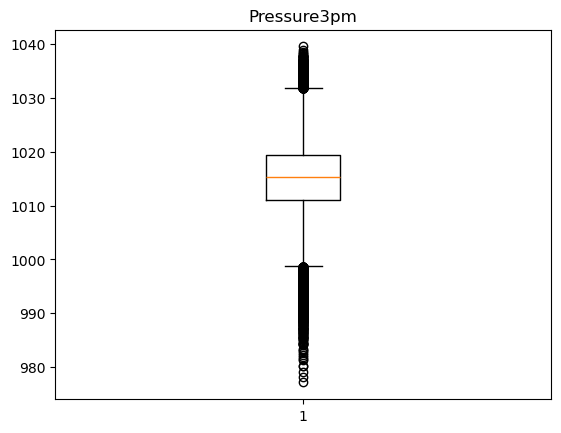

q1----------> 3.0
q2----------> 4.4474612602152455
q3----------> 6.0
iqr----------> 3.0
upper----------> 10.5
lower----------> 1.5


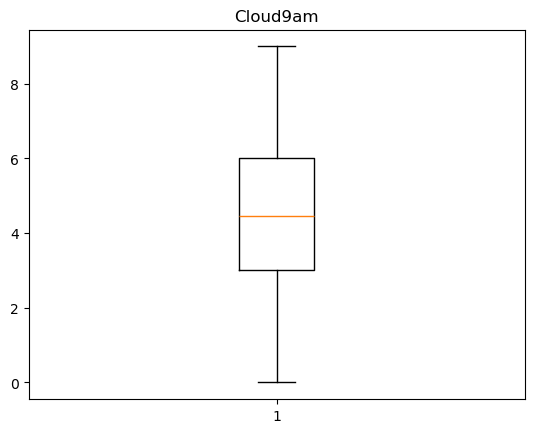

q1----------> 4.0
q2----------> 4.509930082924903
q3----------> 6.0
iqr----------> 2.0
upper----------> 9.0
lower----------> 3.0


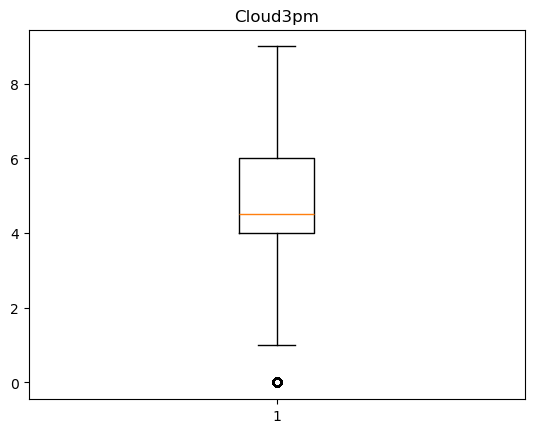

q1----------> 12.3
q2----------> 16.8
q3----------> 21.5
iqr----------> 9.2
upper----------> 35.3
lower----------> 7.700000000000001


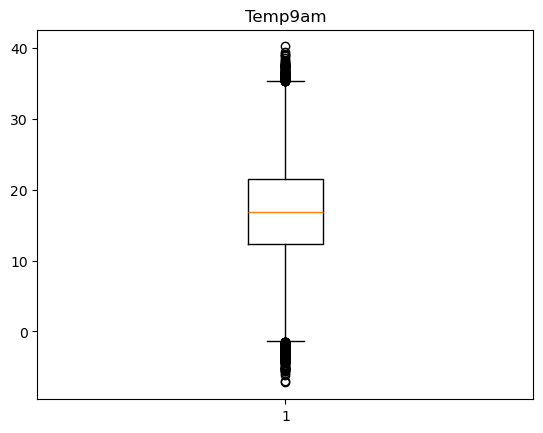

q1----------> 16.7
q2----------> 21.4
q3----------> 26.2
iqr----------> 9.5
upper----------> 40.45
lower----------> 11.95


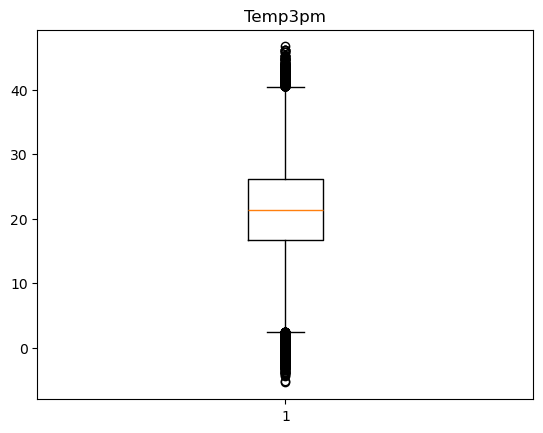

In [34]:
o1=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
for i in o1:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)

    iqr=q3-q1

    upper=q3+1.5*iqr
    lower=q3-1.5*iqr

    print("q1---------->",q1)
    print("q2---------->",q2)
    print("q3---------->",q3)
    print("iqr---------->",iqr)
    print("upper---------->",upper)
    print("lower---------->",lower)

    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

# replace outliers (with upper & lower whisker)

In [36]:
df.loc[df["MinTemp"]>30.450000000000003]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-29,MelbourneAirport,30.5,44.2,0.0,20.400000,10.300000,N,59.0,N,N,...,15.0,10.0,1011.2,1009.6,1.000000,4.00000,35.4,42.4,No,No
2015-12-20,Mildura,31.9,35.7,0.0,20.000000,4.500000,SSW,48.0,SSW,SW,...,28.0,41.0,1005.8,1007.4,4.447461,4.50993,32.5,31.0,No,No
2009-01-28,Adelaide,30.7,45.7,0.0,13.000000,12.500000,NE,35.0,N,WNW,...,10.0,7.0,1007.5,1005.3,4.447461,4.50993,38.3,43.9,No,No
2009-01-29,Adelaide,33.9,43.4,0.0,14.600000,12.900000,NNW,50.0,N,WNW,...,16.0,11.0,1009.0,1007.5,4.447461,4.50993,37.3,42.4,No,No
2015-12-07,Adelaide,30.7,38.5,0.0,5.468232,7.611178,ESE,57.0,E,WNW,...,19.0,21.0,1004.8,1005.1,4.447461,4.50993,34.3,37.1,No,Yes
2017-01-07,Adelaide,31.4,40.7,0.0,5.468232,7.611178,SW,44.0,NE,WNW,...,26.0,17.0,1006.7,1003.2,4.447461,4.50993,34.5,39.2,No,No
2009-02-07,Woomera,31.4,46.2,0.0,22.000000,12.600000,NNW,61.0,NW,N,...,18.0,7.0,1004.4,1003.0,1.000000,1.00000,37.9,45.3,No,No
2014-02-12,Woomera,31.4,43.6,0.0,17.200000,10.600000,N,70.0,NE,N,...,27.0,19.0,1008.5,1005.8,5.000000,4.50993,34.2,41.2,No,No
2015-12-19,Woomera,31.8,44.6,0.0,17.600000,9.300000,NNE,56.0,NNE,N,...,11.0,7.0,1005.6,1001.4,4.447461,4.50993,36.9,42.3,No,No


In [37]:
df.loc[df["MinTemp"]>30.450000000000003,"MinTemp"]=30.450000000000003

In [38]:
df.loc[df["MinTemp"]>30.450000000000003]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [39]:
df.loc[df["MinTemp"]<3.1499999999999986,"MinTemp"]=3.1499999999999986

In [40]:
df.loc[df["MinTemp"]<3.1499999999999986]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [41]:
df.loc[df["MaxTemp"]>43.5,"MaxTemp"]=43.5

In [42]:
df.loc[df["MaxTemp"]>43.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [43]:
df.loc[df["MaxTemp"]<12.9,"MaxTemp"]=12.9

In [44]:
df.loc[df["MaxTemp"]<12.9]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [45]:
df.loc[df["Rainfall"]>2.5,"Rainfall"]=2.5

In [46]:
df.loc[df["Rainfall"]>2.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [47]:
df.loc[df["Rainfall"]<-0.5,"Rainfall"]=-0.5

In [48]:
df.loc[df["Rainfall"]<-0.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [49]:
df.loc[df["Evaporation"]>7.670578807306155,"Evaporation"]=7.670578807306155

In [50]:
df.loc[df["Evaporation"]>7.670578807306155]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [51]:
df.loc[df["Evaporation"]<3.265884238538769,"Evaporation"]=3.265884238538769

In [52]:
df.loc[df["Evaporation"]<3.265884238538769]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [53]:
df.loc[df["Sunshine"]>10.333233719008263,"Sunshine"]=10.333233719008263

In [54]:
df.loc[df["Sunshine"]>10.333233719008263]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [55]:
df.loc[df["Sunshine"]<7.066766280991735,"Sunshine"]=7.066766280991735

In [56]:
df.loc[df["Sunshine"]<7.066766280991735]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [57]:
df.loc[df["WindGustSpeed"]>68.5,"WindGustSpeed"]=68.5

In [58]:
df.loc[df["WindGustSpeed"]>68.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [59]:
df.loc[df["WindGustSpeed"]<23.5,"WindGustSpeed"]=23.5

In [60]:
df.loc[df["WindGustSpeed"]<23.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [61]:
df.loc[df["WindSpeed9am"]>37.0,"WindSpeed9am"]=37.0

In [62]:
df.loc[df["WindSpeed9am"]>37.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [63]:
df.loc[df["WindSpeed9am"]<1.0,"WindSpeed9am"]=1.0

In [64]:
df.loc[df["WindSpeed9am"]<1.0]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [65]:
df.loc[df["WindSpeed3pm"]>40.5,"WindSpeed3pm"]=40.5

In [66]:
df.loc[df["WindSpeed3pm"]>40.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [67]:
df.loc[df["WindSpeed3pm"]<7.5,"WindSpeed3pm"]=7.5

In [68]:
df.loc[df["WindSpeed3pm"]<7.5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,


In [69]:
df.loc[df["Humidity9am"]>122.0,"Humidity9am"]=122.0

In [70]:
df.loc[df["Humidity9am"]<44.0,"Humidity9am"]=44.0

In [71]:
df.loc[df["Pressure9am"]>1034.25,"Pressure9am"]=1034.25

In [72]:
df.loc[df["Pressure9am"]<1009.35,"Pressure9am"]=1009.35

In [73]:
df.loc[df["Pressure3pm"]>1031.85,"Pressure3pm"]=1031.85

In [74]:
df.loc[df["Pressure3pm"]<1006.95,"Pressure3pm"]=1006.95

In [75]:
df.loc[df["Cloud9am"]>10.5,"Cloud9am"]=10.5

In [76]:
df.loc[df["Cloud9am"]<1.5,"Cloud9am"]=1.5

In [77]:
df.loc[df["Cloud3pm"]>9.0,"Cloud3pm"]=9.0

In [78]:
df.loc[df["Cloud3pm"]<3.0,"Cloud3pm"]=3.0

In [79]:
df.loc[df["Temp9am"]>35.3,"Temp9am"]=35.3

In [80]:
df.loc[df["Temp9am"]<7.700000000000001,"Temp9am"]=7.700000000000001

In [81]:
df.loc[df["Temp3pm"]>40.45,"Temp3pm"]=40.45

In [82]:
df.loc[df["Temp3pm"]<11.95,"Temp3pm"]=11.95

# check for outliers again

q1----------> 7.7
q2----------> 12.1
q3----------> 16.8
iqr----------> 9.100000000000001
upper----------> 30.450000000000003
lower----------> 3.1499999999999986


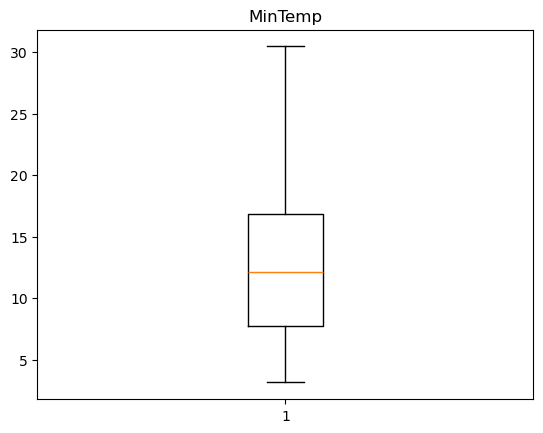

q1----------> 18.0
q2----------> 22.7
q3----------> 28.2
iqr----------> 10.2
upper----------> 43.5
lower----------> 12.9


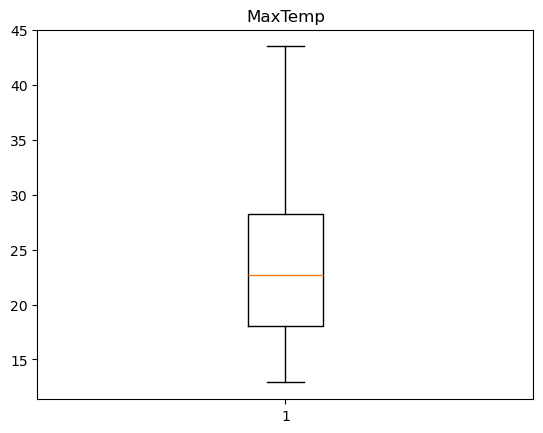

q1----------> 0.0
q2----------> 0.0
q3----------> 1.0
iqr----------> 1.0
upper----------> 2.5
lower----------> -0.5


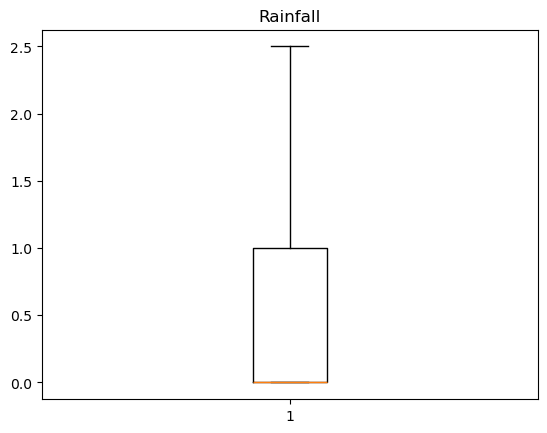

q1----------> 4.0
q2----------> 5.468231522922462
q3----------> 5.468231522922462
iqr----------> 1.468231522922462
upper----------> 7.670578807306155
lower----------> 3.265884238538769


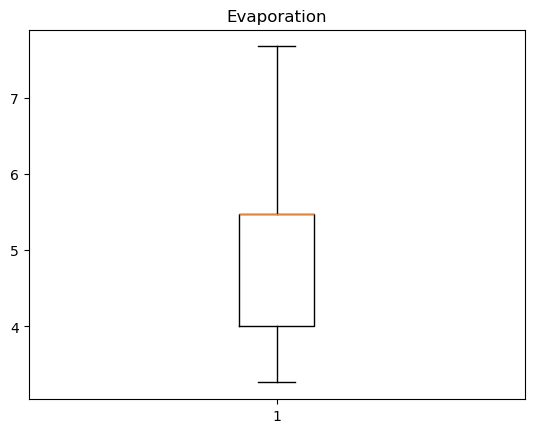

q1----------> 7.6111775206611565
q2----------> 7.6111775206611565
q3----------> 8.7
iqr----------> 1.0888224793388428
upper----------> 10.333233719008263
lower----------> 7.066766280991735


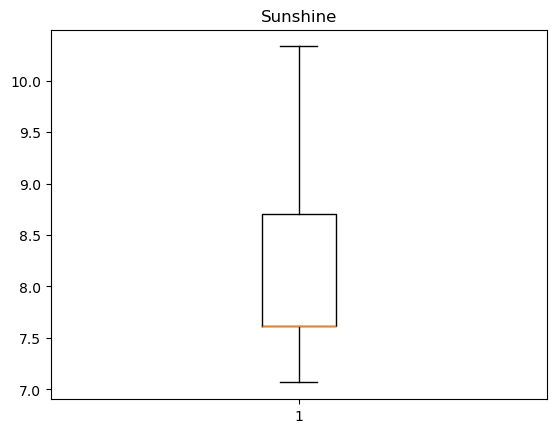

q1----------> 31.0
q2----------> 39.0
q3----------> 46.0
iqr----------> 15.0
upper----------> 68.5
lower----------> 23.5


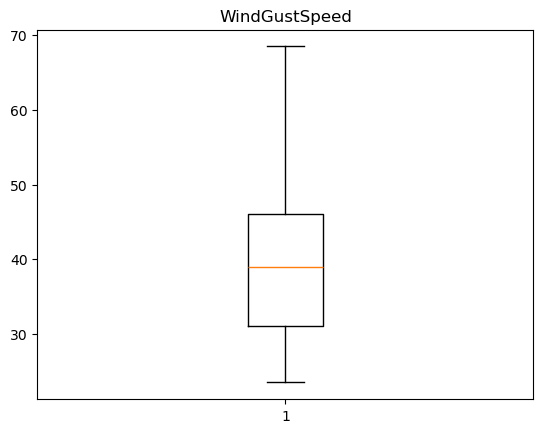

q1----------> 7.0
q2----------> 13.0
q3----------> 19.0
iqr----------> 12.0
upper----------> 37.0
lower----------> 1.0


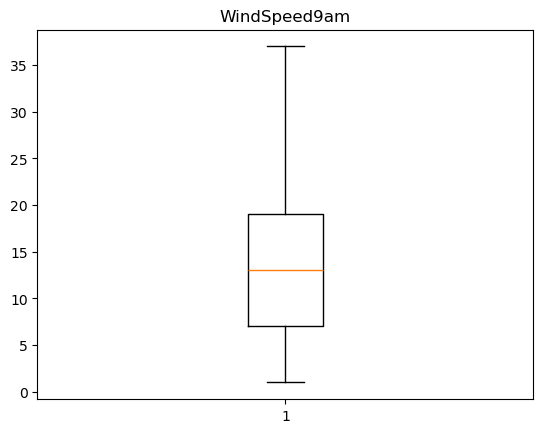

q1----------> 13.0
q2----------> 18.662656778887342
q3----------> 24.0
iqr----------> 11.0
upper----------> 40.5
lower----------> 7.5


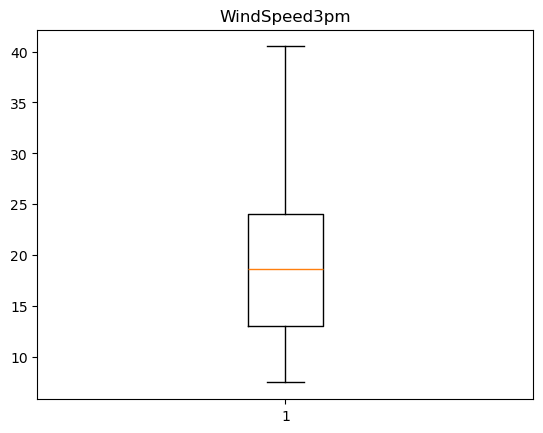

q1----------> 57.0
q2----------> 69.0
q3----------> 83.0
iqr----------> 26.0
upper----------> 122.0
lower----------> 44.0


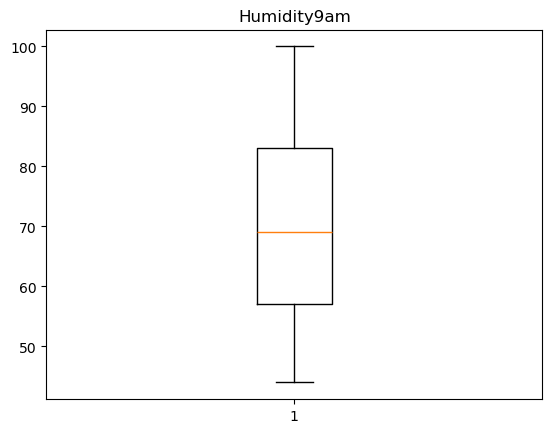

q1----------> 37.0
q2----------> 51.5391158755046
q3----------> 65.0
iqr----------> 28.0
upper----------> 107.0
lower----------> 23.0


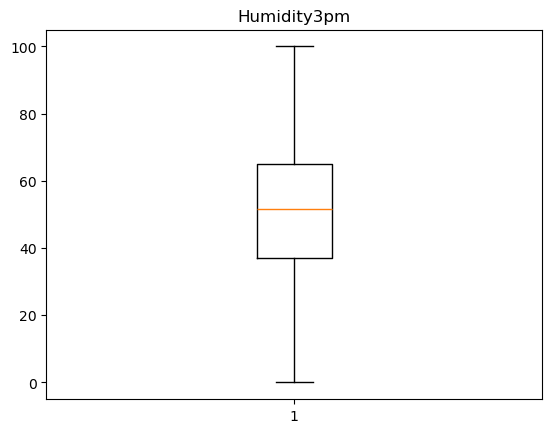

q1----------> 1013.5
q2----------> 1017.6499397983052
q3----------> 1021.8
iqr----------> 8.299999999999955
upper----------> 1034.25
lower----------> 1009.35


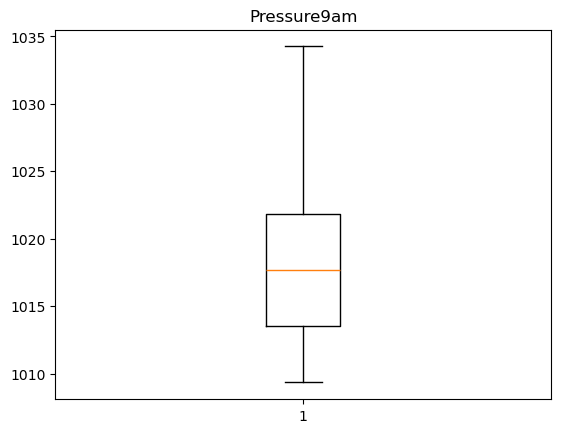

q1----------> 1011.1
q2----------> 1015.2558888309618
q3----------> 1019.4
iqr----------> 8.299999999999955
upper----------> 1031.85
lower----------> 1006.95


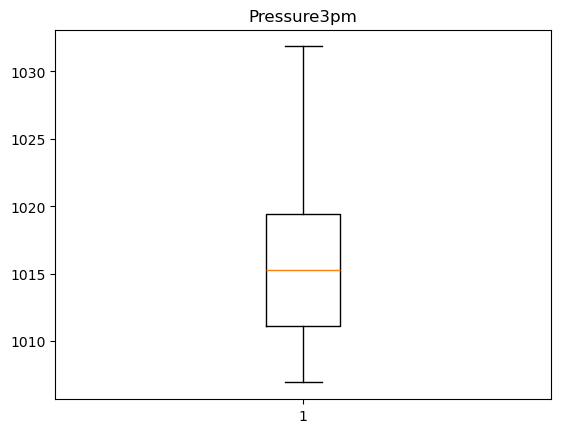

q1----------> 3.0
q2----------> 4.4474612602152455
q3----------> 6.0
iqr----------> 3.0
upper----------> 10.5
lower----------> 1.5


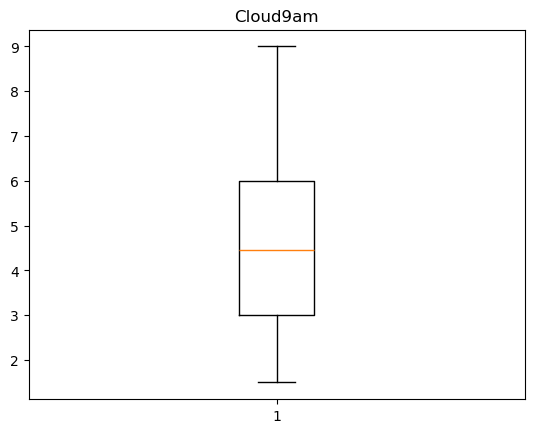

q1----------> 4.0
q2----------> 4.509930082924903
q3----------> 6.0
iqr----------> 2.0
upper----------> 9.0
lower----------> 3.0


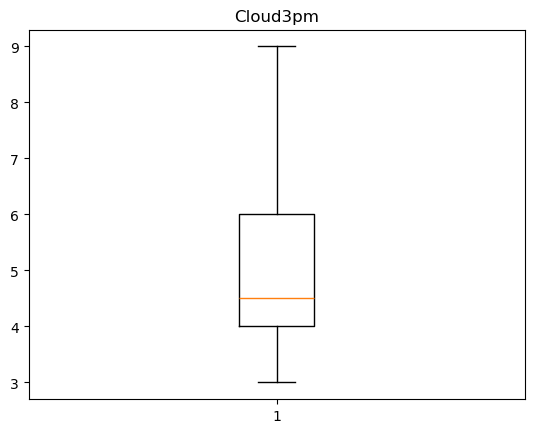

q1----------> 12.3
q2----------> 16.8
q3----------> 21.5
iqr----------> 9.2
upper----------> 35.3
lower----------> 7.700000000000001


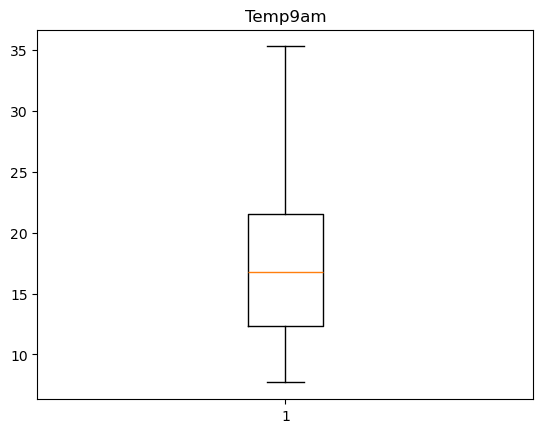

q1----------> 16.7
q2----------> 21.4
q3----------> 26.2
iqr----------> 9.5
upper----------> 40.45
lower----------> 11.95


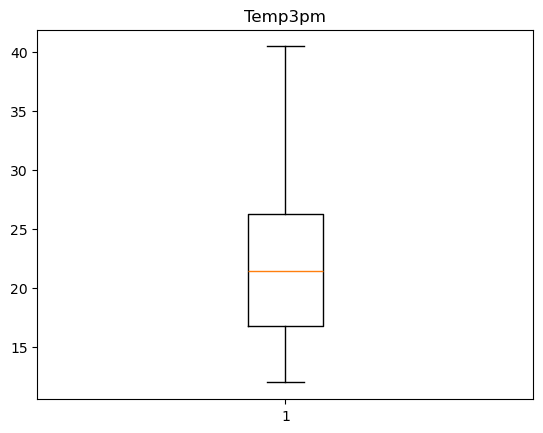

In [84]:
o1=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
for i in o1:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)

    iqr=q3-q1

    upper=q3+1.5*iqr
    lower=q3-1.5*iqr

    print("q1---------->",q1)
    print("q2---------->",q2)
    print("q3---------->",q3)
    print("iqr---------->",iqr)
    print("upper---------->",upper)
    print("lower---------->",lower)

    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [85]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.40,22.900000,0.6,5.468232,7.611178,W,44.00000,W,WNW,...,71.0,22.0,1009.35,1007.10,8.000000,4.50993,16.9,21.8,No,No
2008-12-02,Albury,7.40,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,...,44.0,25.0,1010.60,1007.80,4.447461,4.50993,17.2,24.3,No,No
2008-12-03,Albury,12.90,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,...,44.0,30.0,1009.35,1008.70,4.447461,3.00000,21.0,23.2,No,No
2008-12-04,Albury,9.20,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,E,...,45.0,16.0,1017.60,1012.80,4.447461,4.50993,18.1,26.5,No,No
2008-12-05,Albury,17.50,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,NW,...,82.0,33.0,1010.80,1006.95,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,3.15,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,...,51.0,24.0,1024.60,1020.30,4.447461,4.50993,10.1,22.4,No,No
2017-06-22,Uluru,3.60,25.300000,0.0,5.468232,7.611178,NNW,23.50000,SE,N,...,56.0,21.0,1023.50,1019.10,4.447461,4.50993,10.9,24.5,No,No
2017-06-23,Uluru,5.40,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,...,53.0,24.0,1021.00,1016.80,4.447461,4.50993,12.5,26.1,No,No


# skewness

In [87]:
from scipy.stats import skew

In [88]:
sk=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
for i in sk:
    print(i,"-------------------->",skew(df[i]))

MinTemp --------------------> 0.26996111570186376
MaxTemp --------------------> 0.4232373085413535
Rainfall --------------------> 1.2125065416491412
Evaporation --------------------> 0.09459919906701272
Sunshine --------------------> 1.106527838303228
WindGustSpeed --------------------> 0.6598363785136048
WindSpeed9am --------------------> 0.5568859057381361
WindSpeed3pm --------------------> 0.584623953490658
Humidity9am --------------------> 0.05439895220909053
Humidity3pm --------------------> 0.03414718863598944
Pressure9am --------------------> 0.4596827747049193
Pressure3pm --------------------> 0.45420484580701226
Cloud9am --------------------> 0.0242012639392806
Cloud3pm --------------------> 0.6469292421456819
Temp9am --------------------> 0.3352550006764873
Temp3pm --------------------> 0.46114725094494313


# label encoding [features(categorical data)]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
lr=LabelEncoder()

In [93]:
df["Location"]=lr.fit_transform(df["Location"])

In [94]:
df["WindGustDir"]=lr.fit_transform(df["WindGustDir"])

In [95]:
df["WindDir3pm"]=lr.fit_transform(df["WindDir3pm"])

In [96]:
df["WindDir9am"]=lr.fit_transform(df["WindDir9am"])

In [97]:
df["RainToday"]=lr.fit_transform(df["RainToday"])

In [98]:
df["RainTomorrow"]=lr.fit_transform(df["RainTomorrow"])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460

# scaling (only on numerical features)

# standardization

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
ss=StandardScaler()

In [104]:
# df=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

In [105]:
df["MinTemp"]=ss.fit_transform(df[["MinTemp"]])

In [106]:
df["MaxTemp"]=ss.fit_transform(df[["MaxTemp"]])

In [107]:
df["Rainfall"]=ss.fit_transform(df[["Rainfall"]])

In [108]:
df["Evaporation"]=ss.fit_transform(df[["Evaporation"]])

In [109]:
df["Sunshine"]=ss.fit_transform(df[["Sunshine"]])

In [110]:
df["WindGustSpeed"]=ss.fit_transform(df[["WindGustSpeed"]])

In [111]:
df["WindSpeed9am"]=ss.fit_transform(df[["WindSpeed9am"]])

In [112]:
df["WindSpeed3pm"]=ss.fit_transform(df[["WindSpeed3pm"]])

In [113]:
df["Humidity9am"]=ss.fit_transform(df[["Humidity9am"]])

In [114]:
df["Pressure9am"]=ss.fit_transform(df[["Pressure9am"]])

In [115]:
df["Pressure3pm"]=ss.fit_transform(df[["Pressure3pm"]])

In [116]:
df["Cloud9am"]=ss.fit_transform(df[["Cloud9am"]])

In [117]:
df["Cloud3pm"]=ss.fit_transform(df[["Cloud3pm"]])

In [118]:
df["Temp9am"]=ss.fit_transform(df[["Temp9am"]])

In [119]:
df["Temp3pm"]=ss.fit_transform(df[["Temp3pm"]])

In [120]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,0.168156,-0.066290,-0.014673,0.126267,-0.443206,13,0.340181,13,14,...,0.056433,22.0,-1.458436,-1.428657,1.682063,-0.231140,-0.042785,-0.004281,0,0
2008-12-02,2,-0.829960,0.256009,-0.621711,0.126267,-0.443206,14,0.340181,6,15,...,-1.581251,25.0,-1.248257,-1.311003,-0.070568,-0.231140,0.006207,0.377455,0,0
2008-12-03,2,0.084980,0.343909,-0.621711,0.126267,-0.443206,15,0.511968,13,15,...,-1.581251,30.0,-1.458436,-1.159734,-0.070568,-1.205543,0.626775,0.209491,0,0
2008-12-04,2,-0.530525,0.680858,-0.621711,0.126267,-0.443206,4,-1.377683,9,0,...,-1.520596,16.0,-0.071253,-0.470617,-0.070568,-0.231140,0.153184,0.713383,0,0
2008-12-05,2,0.850202,1.310805,0.390019,0.126267,-0.443206,13,0.082502,1,7,...,0.723637,33.0,-1.214628,-1.453869,1.188717,2.021105,0.104191,1.202006,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,41,-1.536959,0.006960,-0.621711,0.126267,-0.443206,0,-0.776431,9,1,...,-1.156666,24.0,1.105750,0.789963,-0.070568,-0.231140,-1.153275,0.087335,0,0
2017-06-22,41,-1.462100,0.285309,-0.621711,0.126267,-0.443206,6,-1.420630,9,3,...,-0.853391,21.0,0.920792,0.588270,-0.070568,-0.231140,-1.022629,0.407994,0,0
2017-06-23,41,-1.162665,0.519708,-0.621711,0.126267,-0.443206,3,-0.261071,9,14,...,-1.035356,24.0,0.500434,0.201692,-0.070568,-0.231140,-0.761337,0.652305,0,0


# normalization

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
mms=MinMaxScaler()

In [124]:
# df=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

In [125]:
df["MinTemp"]=mms.fit_transform(df[["MinTemp"]])

In [126]:
df["MaxTemp"]=mms.fit_transform(df[["MaxTemp"]])

In [127]:
df["Rainfall"]=mms.fit_transform(df[["Rainfall"]])

In [128]:
df["Evaporation"]=mms.fit_transform(df[["Evaporation"]])

In [129]:
df["Sunshine"]=mms.fit_transform(df[["Sunshine"]])

In [130]:
df["WindGustSpeed"]=mms.fit_transform(df[["WindGustSpeed"]])

In [131]:
df["WindSpeed9am"]=mms.fit_transform(df[["WindSpeed9am"]])

In [132]:
df["WindSpeed3pm"]=mms.fit_transform(df[["WindSpeed3pm"]])

In [133]:
df["Humidity9am"]=mms.fit_transform(df[["Humidity9am"]])

In [134]:
df["Humidity3pm"]=mms.fit_transform(df[["Humidity3pm"]])

In [135]:
df["Pressure9am"]=mms.fit_transform(df[["Pressure9am"]])

In [136]:
df["Pressure3pm"]=mms.fit_transform(df[["Pressure3pm"]])

In [137]:
df["Cloud9am"]=mms.fit_transform(df[["Cloud9am"]])

In [138]:
df["Cloud3pm"]=mms.fit_transform(df[["Cloud3pm"]])

In [139]:
df["Temp9am"]=mms.fit_transform(df[["Temp9am"]])

In [140]:
df["Temp3pm"]=mms.fit_transform(df[["Temp3pm"]])

In [141]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,0.375458,0.326797,0.24,0.5,0.166667,13,0.455556,13,14,...,0.482143,0.22,0.000000,0.006024,0.866667,0.251655,0.333333,0.345614,0,0
2008-12-02,2,0.155678,0.398693,0.00,0.5,0.166667,14,0.455556,6,15,...,0.000000,0.25,0.050201,0.034137,0.392995,0.251655,0.344203,0.433333,0,0
2008-12-03,2,0.357143,0.418301,0.00,0.5,0.166667,15,0.500000,13,15,...,0.000000,0.30,0.000000,0.070281,0.392995,0.000000,0.481884,0.394737,0,0
2008-12-04,2,0.221612,0.493464,0.00,0.5,0.166667,4,0.011111,9,0,...,0.017857,0.16,0.331325,0.234940,0.392995,0.251655,0.376812,0.510526,0,0
2008-12-05,2,0.525641,0.633987,0.40,0.5,0.166667,13,0.388889,1,7,...,0.678571,0.33,0.058233,0.000000,0.733333,0.833333,0.365942,0.622807,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,41,0.000000,0.343137,0.00,0.5,0.166667,0,0.166667,9,1,...,0.125000,0.24,0.612450,0.536145,0.392995,0.251655,0.086957,0.366667,0,0
2017-06-22,41,0.016484,0.405229,0.00,0.5,0.166667,6,0.000000,9,3,...,0.214286,0.21,0.568273,0.487952,0.392995,0.251655,0.115942,0.440351,0,0
2017-06-23,41,0.082418,0.457516,0.00,0.5,0.166667,3,0.300000,9,14,...,0.160714,0.24,0.467871,0.395582,0.392995,0.251655,0.173913,0.496491,0,0


# correlation

In [143]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,-0.012021,-0.025947,0.004307,0.019953,-0.000602,-0.003732,0.069012,-0.002439,0.008769,...,-0.007080,0.012786,0.034851,0.044157,-0.010543,-0.017169,-0.021442,-0.029337,-0.005484,-0.005498
MinTemp,-0.012021,1.000000,0.730258,0.049928,0.407467,0.123440,-0.145075,0.163901,-0.037967,-0.167129,...,-0.213798,0.011343,-0.456480,-0.459486,0.059877,0.027972,0.895811,0.695847,0.049654,0.079736
MaxTemp,-0.025947,0.730258,1.000000,-0.239346,0.495694,0.329872,-0.214066,0.073204,-0.214874,-0.181036,...,-0.471357,-0.492739,-0.365106,-0.444307,-0.222672,-0.200904,0.881662,0.970184,-0.224172,-0.154000
Rainfall,0.004307,0.049928,-0.239346,1.000000,-0.174404,-0.228555,0.140212,0.154900,0.167844,0.129676,...,0.381670,0.391592,-0.157970,-0.079564,0.260957,0.212648,-0.109328,-0.242322,0.904474,0.314531
Evaporation,0.019953,0.407467,0.495694,-0.174404,1.000000,0.268764,-0.092346,0.142776,-0.074160,-0.069503,...,-0.354159,-0.268643,-0.267244,-0.287690,-0.138862,-0.142275,0.481324,0.478624,-0.165709,-0.095786
Sunshine,-0.000602,0.123440,0.329872,-0.228555,0.268764,1.000000,-0.098382,-0.019575,-0.079584,-0.059687,...,-0.363876,-0.389241,-0.004025,-0.051043,-0.485169,-0.446665,0.255051,0.353299,-0.205788,-0.259485
WindGustDir,-0.003732,-0.145075,-0.214066,0.140212,-0.092346,-0.098382,1.000000,0.136224,0.353790,0.563161,...,0.063540,0.065027,-0.110981,-0.024938,0.064120,0.049157,-0.185787,-0.225153,0.124675,0.048774
WindGustSpeed,0.069012,0.163901,0.073204,0.154900,0.142776,-0.019575,0.136224,1.000000,0.071686,0.138450,...,-0.197353,-0.022293,-0.395525,-0.353248,0.054093,0.088104,0.137542,0.041968,0.146342,0.220586
WindDir9am,-0.002439,-0.037967,-0.214874,0.167844,-0.074160,-0.079584,0.353790,0.071686,1.000000,0.301249,...,0.069472,0.148476,-0.046981,0.039920,0.080861,0.047944,-0.124191,-0.222154,0.167718,0.035341
WindDir3pm,0.008769,-0.167129,-0.181036,0.129676,-0.069503,-0.059687,0.563161,0.138450,0.301249,1.000000,...,0.032700,-0.006052,-0.122857,-0.033682,0.047845,0.042267,-0.182120,-0.192677,0.121719,0.028890


# train_test_split

In [145]:
x = df.drop(['RainTomorrow','WindDir9am','WindSpeed9am','Humidity9am','Pressure9am','Cloud9am','Temp9am'],axis =1)
y = df['RainTomorrow']

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, random_state=124859 )

In [147]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday
Date,,,,,,,,,,,,,,,
2010-10-30,38,0.474359,0.437908,0.000000,0.000000,0.867369,4,0.922222,4,0.954545,0.590000,0.194779,0.500000,0.468421,0
2014-10-27,32,0.210623,0.411765,0.240000,0.439103,1.000000,8,0.433333,12,0.712121,0.410000,0.479920,0.000000,0.436842,0
2011-03-09,17,0.470696,0.375817,1.000000,0.500000,0.166667,7,0.166667,7,0.227273,0.580000,0.122490,0.251655,0.429825,1
2009-05-03,7,0.404762,0.388889,0.000000,0.166667,0.193859,1,0.166667,2,0.106061,0.480000,0.596386,0.333333,0.363158,0
2012-08-16,13,0.529304,0.535948,0.000000,0.620728,1.000000,0,0.211111,6,0.378788,0.410000,0.178715,0.166667,0.573684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-24,3,0.705128,0.774510,0.000000,1.000000,1.000000,10,0.677778,2,0.227273,0.250000,0.078313,0.166667,0.812281,0
2014-08-22,14,0.419414,0.133987,1.000000,0.500000,0.166667,10,0.722222,8,0.954545,0.990000,0.672691,0.251655,0.114035,1
2015-06-04,7,0.155678,0.307190,0.000000,0.000000,0.836755,11,0.000000,15,0.000000,0.450000,0.463855,0.000000,0.335088,0


In [148]:
y_train

Date
2010-10-30    0
2014-10-27    0
2011-03-09    0
2009-05-03    0
2012-08-16    0
             ..
2015-02-24    0
2014-08-22    1
2015-06-04    0
2017-01-12    0
2009-02-15    0
Name: RainTomorrow, Length: 109095, dtype: int32

# Model selection 

In [150]:
# As this is a classification model because the output has only two class to predict i.e. yes/no..............so we can't use linearRegression

# LogisticRegression

In [152]:
def train_model_lr():
    from sklearn.linear_model import LogisticRegressionCV

    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    return model,"Lr"

# NaveBayes

In [154]:
def train_model_nb():
    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB()
    model.fit(x_train,y_train)
    return model,"nb"

# prepare model list

In [156]:
models=[train_model_lr(), train_model_nb() ]

# evaluate model as per score

In [157]:
def evaluate_model(model,model_name):
    from sklearn.metrics import  confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
    y_true=y_test
    y_predict=model.predict(x_test)
    a=accuracy_score(y_true,y_predict)*100
    p=precision_score(y_true,y_predict)*100
    r=recall_score(y_true,y_predict)*100
    f1=f1_score(y_true,y_predict)*100
    return model_name,a,p,r,f1

In [158]:
rows=[]
for (model,model_name) in models:
    rows.append(evaluate_model(model,model_name))

In [159]:
df2=pd.DataFrame(rows,columns=["Algorithm","accuracy_score","precision_score","recall_score","f1_score"])
df2

,Algorithm,accuracy_score,precision_score,recall_score,f1_score
0,Lr,84.124845,70.198311,47.949329,56.978911
1,nb,78.468307,50.697493,65.182491,57.034680
